In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [48]:
# Loading data
with open('parameters.json', 'r') as parameters:
    data = json.load(parameters)


for name in data.keys():
    data[name] = pd.read_csv(data[name]['path_to_output'])

In [49]:
# wrapper function to apply methods for each data set in data
def aplpy_to_all(func, data):
    for name in data.keys():
        func(data[name], name)

First of all, each benchmark tells us number of failed and successfull actions. Let us look whether there is some parameter value that led to more than 0 fails

In [50]:
def apply_check(df, name):

    if df['Fail'].sum() == 0:
        print(f'No values of parameter {name} led to failures')
        return

    def check_failures(row, name):
        if int(row['Fail']) > 0:
            print(f'Parameter {name} led to {row['Fail']} number of failures')
    
    df.apply(lambda row: check_failures(row, name), axis=1)

In [51]:
aplpy_to_all(apply_check, data)

No values of parameter batchSize led to failures
No values of parameter maxBlockCountToStore led to failures
No values of parameter maxPropagationBurstLatency led to failures
No values of parameter pullInterval led to failures


Great, we can be sure that there is no parameter value that led to extraordinary benchmark result but failed 99% of the time. Let us now look at the statistics for throughput in each data set.

In [57]:
def show_basic_stat(df, name):
    t = 'Throughput'
    print(f'Analyzing {name}:')
    print(
        f'Average {t}: {df[t].mean()}',
        f'Median {t}: {df[t].median()}',
        f'Min {t}: {df[t].min()}',
        f'Max {t}: {df[t].max()}', sep='\n'
    )
    print(' ')

In [58]:
aplpy_to_all(show_basic_stat, data)

Analyzing batchSize:
Average Throughput: 520.8777777777779
Median Throughput: 523.2
Min Throughput: 487.7
Max Throughput: 562.2
 
Analyzing maxBlockCountToStore:
Average Throughput: 520.8
Median Throughput: 528.4
Min Throughput: 489.0
Max Throughput: 546.7
 
Analyzing maxPropagationBurstLatency:
Average Throughput: 499.62727272727267
Median Throughput: 504.7
Min Throughput: 457.8
Max Throughput: 530.2
 
Analyzing pullInterval:
Average Throughput: 497.39090909090913
Median Throughput: 504.8
Min Throughput: 458.5
Max Throughput: 536.5
 


Finally, let's look at dependence between parameter value on throughput

In [66]:
def scatter_plot(df, name):
    plt.figure(figsize=(5, 3))
    plt.scatter(df[name], df['Throughput'])
    plt.plot(df[name], df['Throughput'])
    plt.xlabel('Throughput')
    plt.ylabel(name)
    plt.title(f'Dependence between {name} and Throughput')
    plt.show()

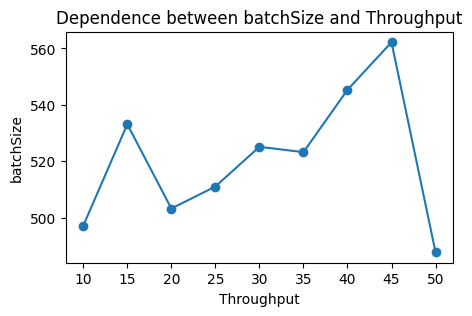

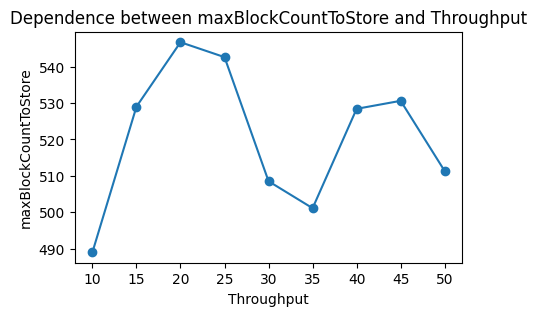

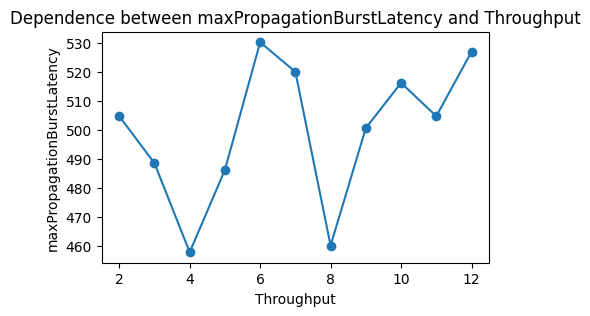

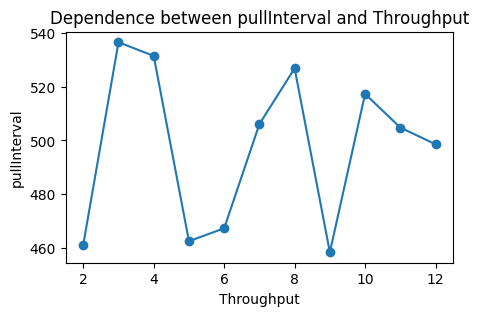

In [67]:
aplpy_to_all(scatter_plot, data)